**Target Variable: Readmission (Binary)**

- Yes: Readmitted '< 30'
- No: 'NO'

# Data Import + Wrangling

In [1]:
# Import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import warnings
warnings.filterwarnings(action='once')

# Import dataset as DataFrame

df = pd.read_csv('/Users/springboard/Desktop/Capstone-II/diabetic_data.csv')
df.shape

(101766, 50)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [3]:
# Drop patient duplicates and retain data corresponding to first instance

df = df.drop_duplicates(subset='patient_nbr', keep='first')

# Drop 'ID' columns

df = df.drop(columns=['encounter_id', 'patient_nbr'], axis=1)
df.shape

(71518, 48)

In [4]:
# Create a target variable column from values in 'readmitted'

## Drop all instances of readmission '>30' 

df = df[df.readmitted != '>30']

## New column for target variable 

def func(row):
    if row['readmitted'] == '<30':
        return 1
    else:
        return 0

df['Target'] = df.apply(func, axis=1)

df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Target
0,Caucasian,Female,[50-60),?,2,1,1,8,?,Cardiology,...,Steady,No,No,No,No,No,Ch,Yes,<30,1
2,Caucasian,Female,[50-60),?,3,1,1,2,?,Surgery-Neuro,...,No,No,No,No,No,No,No,No,NO,0
3,Caucasian,Female,[80-90),?,1,3,7,4,MC,InternalMedicine,...,No,No,No,No,No,No,No,Yes,NO,0
4,Caucasian,Female,[80-90),?,1,1,7,3,?,InternalMedicine,...,No,No,No,No,No,No,Ch,Yes,NO,0
5,AfricanAmerican,Female,[30-40),?,1,1,7,5,?,InternalMedicine,...,No,No,No,No,No,No,No,Yes,NO,0


In [5]:
df.shape

(49293, 49)

**Value Counts**

In [6]:
df.race.value_counts()

Caucasian          36400
AfricanAmerican     9018
?                   1514
Hispanic            1104
Other                867
Asian                390
Name: race, dtype: int64

In [7]:
df.gender.value_counts()

Female             25939
Male               23351
Unknown/Invalid        3
Name: gender, dtype: int64

In [8]:
df.age.value_counts()

[70-80)     12080
[60-70)     11013
[50-60)      8733
[80-90)      7727
[40-50)      4935
[30-40)      2009
[90-100)     1423
[20-30)       850
[10-20)       393
[0-10)        130
Name: age, dtype: int64

In [9]:
df.weight.value_counts()

?            47739
[75-100)       634
[50-75)        454
[100-125)      305
[125-150)       74
[25-50)         50
[150-175)       18
[0-25)          14
[175-200)        5
Name: weight, dtype: int64

In [10]:
df.admission_type_id.value_counts()

1    25049
3    10188
2     8957
6     2714
5     2135
8      222
7       21
4        7
Name: admission_type_id, dtype: int64

In [11]:
# Admission type - remove all instances of 'Not Available', 'NULL', and 'Not Mapped'

df = df[df.admission_type_id != 5]
df = df[df.admission_type_id != 6]
df = df[df.admission_type_id != 8]

df.shape

(44222, 49)

In [12]:
df.discharge_disposition_id.value_counts()

1     27624
3      5191
6      4551
18     1916
22     1045
11      968
2       966
5       597
4       371
7       262
13      222
14      171
23      166
28       50
8        40
15       28
24       21
25       16
19        6
9         5
27        3
12        2
17        1
Name: discharge_disposition_id, dtype: int64

In [13]:
# Discharge type - remove insignificant discharge types

df = df[df.discharge_disposition_id != 28]
df = df[df.discharge_disposition_id != 8]
df = df[df.discharge_disposition_id != 15]
df = df[df.discharge_disposition_id != 24]
df = df[df.discharge_disposition_id != 9]
df = df[df.discharge_disposition_id != 27]
df = df[df.discharge_disposition_id != 12]
df = df[df.discharge_disposition_id != 17]

# Remove all instances of patient expiry, discharge to hospice care, and missing discharge reasons

df = df[df.discharge_disposition_id != 11]
df = df[df.discharge_disposition_id != 13]
df = df[df.discharge_disposition_id != 14]
df = df[df.discharge_disposition_id != 18]
df = df[df.discharge_disposition_id != 19]
df = df[df.discharge_disposition_id != 20]
df = df[df.discharge_disposition_id != 21]
df = df[df.discharge_disposition_id != 25]

df.shape

(40773, 49)

In [14]:
df.admission_source_id.value_counts()

7     22606
1     13503
4      1680
6      1471
2       591
17      376
5       304
9        87
20       77
3        54
8         9
10        5
22        4
14        2
25        2
11        1
13        1
Name: admission_source_id, dtype: int64

In [15]:
# Admission source - remove all instances of 'Not Available', 'NULL', and 'Not Mapped' (% of dataset)

df = df[df.admission_source_id != 9]
df = df[df.admission_source_id != 15]
df = df[df.admission_source_id != 17]
df = df[df.admission_source_id != 20]
df = df[df.admission_source_id != 21]

# Admission source - remove insignificant categories (% of data)

df = df[df.admission_source_id != 8]
df = df[df.admission_source_id != 10]
df = df[df.admission_source_id != 22]
df = df[df.admission_source_id != 14]
df = df[df.admission_source_id != 25]
df = df[df.admission_source_id != 11]
df = df[df.admission_source_id != 13]

df.shape

(40209, 49)

In [16]:
df.time_in_hospital.value_counts()

2     7244
3     7226
1     6278
4     5311
5     3796
6     2829
7     2188
8     1577
9     1039
10     825
11     639
12     499
13     419
14     339
Name: time_in_hospital, dtype: int64

In [17]:
df.payer_code.value_counts()

?     14534
MC    12170
BC     2491
HM     2458
SP     2202
MD     1455
CP     1344
UN     1335
CM      901
OG      475
PO      356
DM      236
WC       93
CH       90
OT       42
MP       22
SI        4
FR        1
Name: payer_code, dtype: int64

In [18]:
df.medical_specialty.value_counts()

?                                       18687
InternalMedicine                         6560
Emergency/Trauma                         2855
Family/GeneralPractice                   2490
Cardiology                               2220
Surgery-General                          1251
Orthopedics                               736
Radiologist                               575
Orthopedics-Reconstructive                500
ObstetricsandGynecology                   433
Nephrology                                401
Surgery-Cardiovascular/Thoracic           390
Psychiatry                                371
Urology                                   326
Pulmonology                               319
Surgery-Neuro                             293
Surgery-Vascular                          221
Gastroenterology                          214
Oncology                                  143
Neurology                                 133
PhysicalMedicineandRehabilitation         119
Pediatrics-Endocrinology          

In [19]:
df.number_outpatient.value_counts().head(10)

0    36089
1     2255
2      842
3      483
4      246
5      116
6       54
7       31
8       30
9       19
Name: number_outpatient, dtype: int64

In [20]:
df.number_emergency.value_counts().head(10)

0     37805
1      1900
2       326
3       101
4        41
5        14
6        10
8         4
11        2
7         2
Name: number_emergency, dtype: int64

In [21]:
df.number_inpatient.value_counts().head(10)

0     36415
1      2801
2       627
3       189
4        89
5        37
6        27
7         7
10        5
8         5
Name: number_inpatient, dtype: int64

In [22]:
df.diag_1.value_counts(dropna=False).head(10)

414    3039
428    1858
786    1658
410    1647
486    1243
715    1128
427    1126
434     944
682     805
780     804
Name: diag_1, dtype: int64

In [23]:
df.diag_2.value_counts(dropna=False).head(10)

250       3061
276       2603
428       2138
401       1928
427       1901
599       1272
496       1138
414       1131
411       1124
250.02     908
Name: diag_2, dtype: int64

In [24]:
df.diag_3.value_counts(dropna=False).head(10)

250    5379
401    4032
276    1967
414    1472
428    1456
427    1359
272     989
496     831
?       806
599     701
Name: diag_3, dtype: int64

In [25]:
df = df[df.diag_3 != '?']
df.shape

(39403, 49)

In [26]:
df.diag_3.value_counts(dropna=False).head(10)

250    5379
401    4032
276    1967
414    1472
428    1456
427    1359
272     989
496     831
599     701
403     636
Name: diag_3, dtype: int64

In [27]:
df.number_diagnoses.value_counts()

9     17536
5      5620
7      4096
8      4091
6      3973
4      2637
3      1397
16       24
13        7
10        7
15        5
12        4
14        3
11        3
Name: number_diagnoses, dtype: int64

In [28]:
df.max_glu_serum.value_counts()

None    39338
>300       49
Norm       12
>200        4
Name: max_glu_serum, dtype: int64

In [29]:
df.A1Cresult.value_counts()

None    31862
>8       3440
Norm     2399
>7       1702
Name: A1Cresult, dtype: int64

In [30]:
df.metformin.value_counts()

No        30737
Steady     7945
Up          477
Down        244
Name: metformin, dtype: int64

In [31]:
df.insulin.value_counts()

No        18960
Steady    12658
Down       4072
Up         3713
Name: insulin, dtype: int64

In [32]:
df.change.value_counts()

No    21728
Ch    17675
Name: change, dtype: int64

In [33]:
df.diabetesMed.value_counts()

Yes    29739
No      9664
Name: diabetesMed, dtype: int64

In [34]:
df.Target.value_counts()

0    34295
1     5108
Name: Target, dtype: int64

In [35]:
# Drop columns with too many missing values, retaining A1C result due to relevance

df = df.drop(columns=['weight', 'payer_code', 'medical_specialty', 'max_glu_serum'], axis=1)
df.shape

(39403, 45)

**Binning**

In [36]:
# Drop 'diag_2' and 'diag_3'

df = df.drop(columns=['diag_2', 'diag_3'], axis=1)

# Convert 'diag_1' to numeric type

df['Primary Diagnosis'] = pd.to_numeric(df['diag_1'],errors='coerce')

# Drop to avoid binning errors

df = df[df['Primary Diagnosis'] != '780']
df = df[df['Primary Diagnosis'] != '781']
df = df[df['Primary Diagnosis'] != '782']
df = df[df['Primary Diagnosis'] != '784']
df = df[df['Primary Diagnosis'] != '785']
df = df[df['Primary Diagnosis'] != '786']
df = df[df['Primary Diagnosis'] != '787']
df = df[df['Primary Diagnosis'] != '788']

df.shape

/Users/springboard/anaconda3/envs/ProjectEnv/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


(39403, 44)

In [37]:
bins = [1, 139, 239, 250.00, 250.99, 279, 289, 319, 359, 389, 459, 519, 579, 629, 679, 709, 739, 759, 799, 999]
labels = ['Infectious Diseases', 'Neoplasms', 'Endocrine (No DM)', 'Diabetes Mellitus', 'Immune System (No DM)', 
          'Blood Diseases', 'Mental Disorders', 'Nervous System', 'Sense Organs', 'Circulatory System',
         'Respiratory System', 'Digestive System', 'Genitourinary System', 'Pregnancy Complications', 'Skin Diseases',
         'Musculoskeletal System', 'Congenital Anomalies', 'Other', 'Injury and poisoning']

df['Binned'] = pd.cut(df['Primary Diagnosis'], bins, labels=labels)
df.head(50)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Target,Primary Diagnosis,Binned
0,Caucasian,Female,[50-60),2,1,1,8,77,6,33,...,No,No,No,No,Ch,Yes,<30,1,401.00,Circulatory System
2,Caucasian,Female,[50-60),3,1,1,2,49,1,11,...,No,No,No,No,No,No,NO,0,722.00,Musculoskeletal System
3,Caucasian,Female,[80-90),1,3,7,4,68,2,23,...,No,No,No,No,No,Yes,NO,0,820.00,Injury and poisoning
4,Caucasian,Female,[80-90),1,1,7,3,46,0,20,...,No,No,No,No,Ch,Yes,NO,0,274.00,Immune System (No DM)
5,AfricanAmerican,Female,[30-40),1,1,7,5,49,0,5,...,No,No,No,No,No,Yes,NO,0,590.00,Genitourinary System
11,Caucasian,Female,[60-70),3,1,1,9,52,1,16,...,No,No,No,No,No,Yes,NO,0,491.00,Respiratory System
16,Caucasian,Female,[70-80),2,3,1,12,47,2,18,...,No,No,No,No,Ch,Yes,NO,0,682.00,Skin Diseases
17,Caucasian,Male,[60-70),2,1,1,8,57,6,31,...,No,No,No,No,No,Yes,NO,0,414.00,Circulatory System
18,Caucasian,Female,[70-80),3,1,1,1,31,1,9,...,No,No,No,No,No,No,NO,0,722.00,Musculoskeletal System
25,Caucasian,Female,[80-90),1,3,7,7,77,0,12,...,No,No,No,No,No,Yes,NO,0,38.00,Infectious Diseases


In [38]:
df.Binned.value_counts()

Circulatory System         11923
Digestive System            3591
Respiratory System          3377
Other                       3045
Diabetes Mellitus           2814
Injury and poisoning        2801
Musculoskeletal System      2371
Genitourinary System        2056
Neoplasms                   1624
Infectious Diseases          993
Skin Diseases                963
Mental Disorders             913
Immune System (No DM)        892
Pregnancy Complications      453
Nervous System               410
Blood Diseases               348
Endocrine (No DM)            181
Sense Organs                 128
Congenital Anomalies          28
Name: Binned, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39403 entries, 0 to 101765
Data columns (total 45 columns):
race                        39403 non-null object
gender                      39403 non-null object
age                         39403 non-null object
admission_type_id           39403 non-null int64
discharge_disposition_id    39403 non-null int64
admission_source_id         39403 non-null int64
time_in_hospital            39403 non-null int64
num_lab_procedures          39403 non-null int64
num_procedures              39403 non-null int64
num_medications             39403 non-null int64
number_outpatient           39403 non-null int64
number_emergency            39403 non-null int64
number_inpatient            39403 non-null int64
diag_1                      39403 non-null object
number_diagnoses            39403 non-null int64
A1Cresult                   39403 non-null object
metformin                   39403 non-null object
repaglinide                 39403 non-null object
n

In [40]:
df_updated = df.dropna()
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38911 entries, 0 to 101765
Data columns (total 45 columns):
race                        38911 non-null object
gender                      38911 non-null object
age                         38911 non-null object
admission_type_id           38911 non-null int64
discharge_disposition_id    38911 non-null int64
admission_source_id         38911 non-null int64
time_in_hospital            38911 non-null int64
num_lab_procedures          38911 non-null int64
num_procedures              38911 non-null int64
num_medications             38911 non-null int64
number_outpatient           38911 non-null int64
number_emergency            38911 non-null int64
number_inpatient            38911 non-null int64
diag_1                      38911 non-null object
number_diagnoses            38911 non-null int64
A1Cresult                   38911 non-null object
metformin                   38911 non-null object
repaglinide                 38911 non-null object
n

In [41]:
df_updated.Target.value_counts()

0    33901
1     5010
Name: Target, dtype: int64

...

# Graphical Exploratory Data Analysis

**Box Plots**

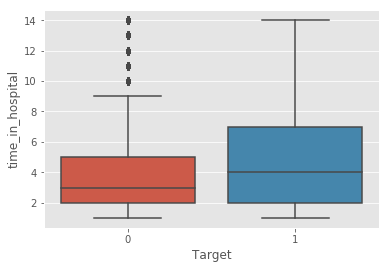

In [42]:
# Number of days between admission and discharge

sns.boxplot(x='Target', y='time_in_hospital', data=df_updated)

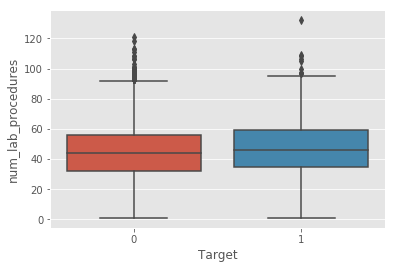

In [43]:
# Number of lab tests performed during encounter

sns.boxplot(x='Target', y='num_lab_procedures', data=df_updated)

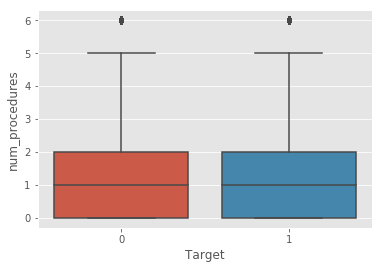

In [44]:
# Number of procedures (other than lab tests) performed during encounter

sns.boxplot(x='Target', y='num_procedures', data=df_updated)

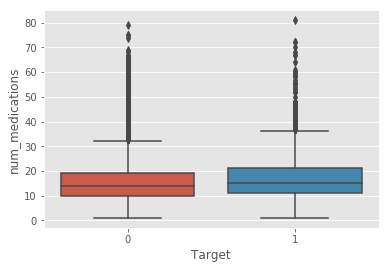

In [45]:
# Number of distinct generic names administered during encounter

sns.boxplot(x='Target', y='num_medications', data=df_updated)

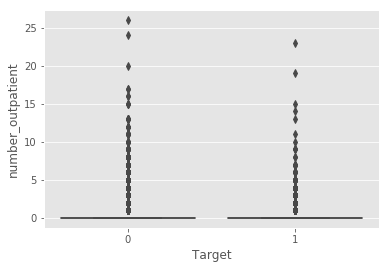

In [46]:
# Number of outpatient visits of the patient in the year preceding encounter

sns.boxplot(x='Target', y='number_outpatient', data=df_updated)

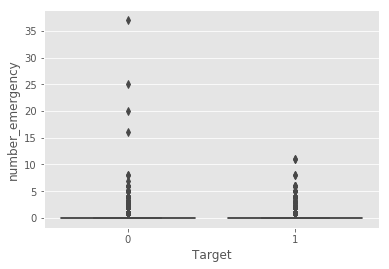

In [47]:
# Number of emergency visits of the patient in the year preceding encounter

sns.boxplot(x='Target', y='number_emergency', data=df_updated)

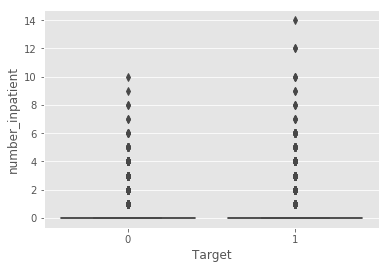

In [48]:
# Number of inpatient visits of the patient in the year preceding encounter

sns.boxplot(x='Target', y='number_inpatient', data=df_updated)

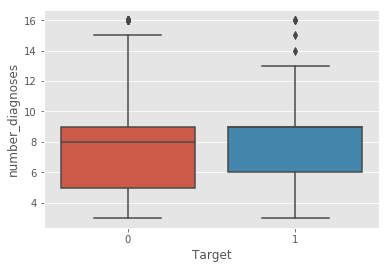

In [49]:
# Number of diagnoses entered into the system

sns.boxplot(x='Target', y='number_diagnoses', data=df_updated)

**Correlation Matrix**

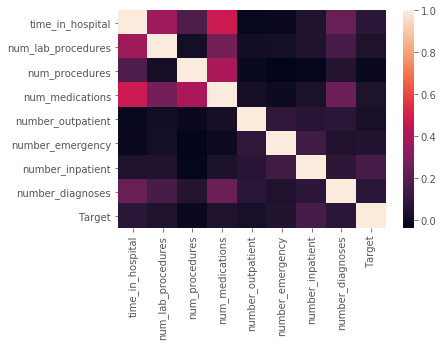

In [50]:
# Correlation Matrix

df_corr = df_updated.loc[:, ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'Target']]

sns.heatmap(df_corr.corr())

...

# Inferential Statistics

In [51]:
import scipy.stats as stats

**Two-Sample T-Tests**

- **Gender vs. Readmission**

$H_{o}$ : There is no difference in the rate of readmission for males and females ($P_{1}$ - $P_{2}$ = 0)  

$H_{a}$ : There is a difference in the rate of readmission for males and females ($P_{1}$ - $P_{2}$ != 0)  

α = 0.05

In [52]:
df = df_updated

m = df[df.gender=='Male']
f = df[df.gender=='Female']

print('Total # of Males = {}'.format(len(m)))
print('Total # of Females = {}'.format(len(f)))

# Number of males readmitted

male_readmit = sum(m.Target)

# Number of females readmitted

fem_readmit = sum(f.Target)

## Readmission Rates

print('Male Readmission Rate = {}'.format(male_readmit/len(m)))
print('Female Readmission Rate = {}'.format(fem_readmit/len(f)))

## 2-sample t-test

m_array = df[df.gender=='Male'].Target
f_array = df[df.gender=='Female'].Target

stats.ttest_ind(m_array, f_array, equal_var=True)

Total # of Males = 18296
Total # of Females = 20612
Male Readmission Rate = 0.12527328377787494
Female Readmission Rate = 0.1318649330487095


Ttest_indResult(statistic=-1.9375618588738568, pvalue=0.052683927154811905)

There is no difference in the rate of readmission for males and females as p > 0.05. 

- **Readmission Rates for Patients with Medication Changes vs. No Changes**

$H_{o}$ : There is no difference in the rate of readmission for patients ($P_{1}$ - $P_{2}$ = 0)  

$H_{a}$ : There is a difference in the rate of readmission for patients ($P_{1}$ - $P_{2}$ != 0)  

α = 0.05

In [53]:
change = df[df.change=='Ch']
no_change = df[df.change=='No']

print('Total # of Changes = {}'.format(len(change)))
print('Total # of No Changes = {}'.format(len(no_change)))

change_readmit = sum(change.Target)
no_change_readmit = sum(no_change.Target)

## Readmission Rates

print('Change Readmission Rate = {}'.format(change_readmit/len(change)))
print('No Change Readmission Rate = {}'.format(no_change_readmit/len(no_change)))

## 2-sample t-test

c_array = df[df.change=='Ch'].Target
nc_array = df[df.change=='No'].Target

stats.ttest_ind(c_array, nc_array, equal_var=True)

Total # of Changes = 17457
Total # of No Changes = 21454
Change Readmission Rate = 0.13937102594947587
No Change Readmission Rate = 0.12011746061340542


Ttest_indResult(statistic=5.641928775816225, pvalue=1.6932172833324904e-08)

There is a significant difference in the rate of readmission for patients with medication changes vs. no changes.

- **Readmission Rates for Patients Prescribed with Diabetes Medication vs. Not Prescribed**

$H_{o}$ : There is no difference in the rate of readmission for patients ($P_{1}$ - $P_{2}$ = 0)  

$H_{a}$ : There is a difference in the rate of readmission for patients ($P_{1}$ - $P_{2}$ != 0)  

α = 0.05

In [54]:
yes = df[df.diabetesMed=='Yes']
no = df[df.diabetesMed=='No']

print('Total # of Prescriptions = {}'.format(len(yes)))
print('Total # of No Prescriptions = {}'.format(len(no)))

presc_readmit = sum(yes.Target)
no_presc_readmit = sum(no.Target)

## Readmission Rates

print('Prescription Readmission Rate = {}'.format(presc_readmit/len(yes)))
print('No Prescription Readmission Rate = {}'.format(no_presc_readmit/len(no)))

## 2-sample t-test

yes_array = df[df.diabetesMed=='Yes'].Target
no_array = df[df.diabetesMed=='No'].Target

stats.ttest_ind(yes_array, no_array, equal_var=True)

Total # of Prescriptions = 29359
Total # of No Prescriptions = 9552
Prescription Readmission Rate = 0.13740250008515276
No Prescription Readmission Rate = 0.10217755443886097


Ttest_indResult(statistic=8.937444724542619, pvalue=4.1533979892637324e-19)

There is a significant difference in the rate of readmission for patients with diabetes presciptions vs. no prescriptions.

...